In [19]:
import random

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

In [20]:
device = torch.device('CUDA' if torch.cuda.is_available() else 'cpu')
batch_size = 100
n_epochs = 15

In [21]:
mnist_train = datasets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)
dloader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [22]:
model = nn.Linear(28 ** 2, 10, bias=True).to(device)
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-1)

for epoch in range(1, n_epochs + 1):
    loss_sum = 0
    n_batches = len(dloader)
    for imgs, targets in dloader:
        imgs = imgs.view(-1, 28 ** 2).to(device)
        targets = targets.to(device)
        loss = loss_func(model(imgs), targets)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_sum += loss
    print(f'epoch: {epoch:02d}/{n_epochs}\tloss: {loss_sum / n_batches:.9f}')

epoch: 01/15	loss: 0.536726773
epoch: 02/15	loss: 0.359174341
epoch: 03/15	loss: 0.331043094
epoch: 04/15	loss: 0.316204160
epoch: 05/15	loss: 0.306986243
epoch: 06/15	loss: 0.300130904
epoch: 07/15	loss: 0.295137584
epoch: 08/15	loss: 0.290639430
epoch: 09/15	loss: 0.287027299
epoch: 10/15	loss: 0.284290254
epoch: 11/15	loss: 0.281771272
epoch: 12/15	loss: 0.279778838
epoch: 13/15	loss: 0.277575701
epoch: 14/15	loss: 0.275884181
epoch: 15/15	loss: 0.274444520


accuracy: 0.8865000009536743
target: 2	prediction: 2


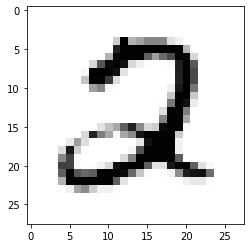

target: 5	prediction: 8


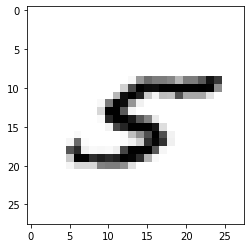

target: 8	prediction: 8


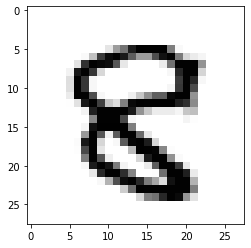

target: 6	prediction: 6


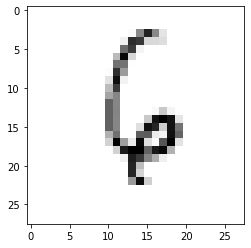

target: 7	prediction: 7


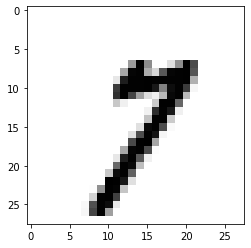

In [23]:
with torch.no_grad():
    imgs = mnist_test.data.view(-1, 28 ** 2).float().to(device)
    targets = mnist_test.targets.to(device)
    is_correct = torch.argmax(model(imgs), dim=1) == targets
    print(f'accuracy: {is_correct.float().mean().item()}')

    for _ in range(5):
        rand_idx = random.randint(0, len(mnist_test) - 1)
        img = mnist_test.data[rand_idx].view(-1, 28 ** 2).float().to(device)
        target = mnist_test.targets[rand_idx].to(device)
        print(f'target: {target.item()}\tprediction: {torch.argmax(model(img), dim=1).item()}')
        plt.imshow(mnist_test.data[rand_idx], cmap='Greys', interpolation='nearest')
        plt.show()

[Reference](https://wikidocs.net/60324)